In [3]:
import pandas as pd
from sklearn import tree
import numpy as np

In [5]:
df=pd.read_csv('../06-12-21 Decision Tree Classifier/zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
classes = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

In [9]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('class_type', axis=1).drop('animal_name', axis=1), 
    df['class_type'], 
    test_size=0.33, random_state=42
)

In [40]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
47,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
53,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1
35,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0


[Text(1085.0, 1009.5428571428572, 'milk <= 0.5\ngini = 0.765\nsamples = 67\nvalue = [24, 17, 3, 11, 2, 3, 7]\nclass = Mammal'),
 Text(930.0, 854.2285714285715, 'feathers <= 0.5\ngini = 0.74\nsamples = 43\nvalue = [0, 17, 3, 11, 2, 3, 7]\nclass = Bird'),
 Text(775.0, 698.9142857142858, 'fins <= 0.5\ngini = 0.716\nsamples = 26\nvalue = [0, 0, 3, 11, 2, 3, 7]\nclass = Fish'),
 Text(620.0, 543.6, 'backbone <= 0.5\ngini = 0.684\nsamples = 15\nvalue = [0, 0, 3, 0, 2, 3, 7]\nclass = Invertebrate'),
 Text(310.0, 388.28571428571433, 'legs <= 5.5\ngini = 0.42\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 3, 7]\nclass = Invertebrate'),
 Text(155.0, 232.97142857142865, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 5]\nclass = Invertebrate'),
 Text(465.0, 232.97142857142865, 'breathes <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 3, 2]\nclass = Bug'),
 Text(310.0, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 2]\nclass = Invertebrate'),
 Text(620.0, 77.65714285

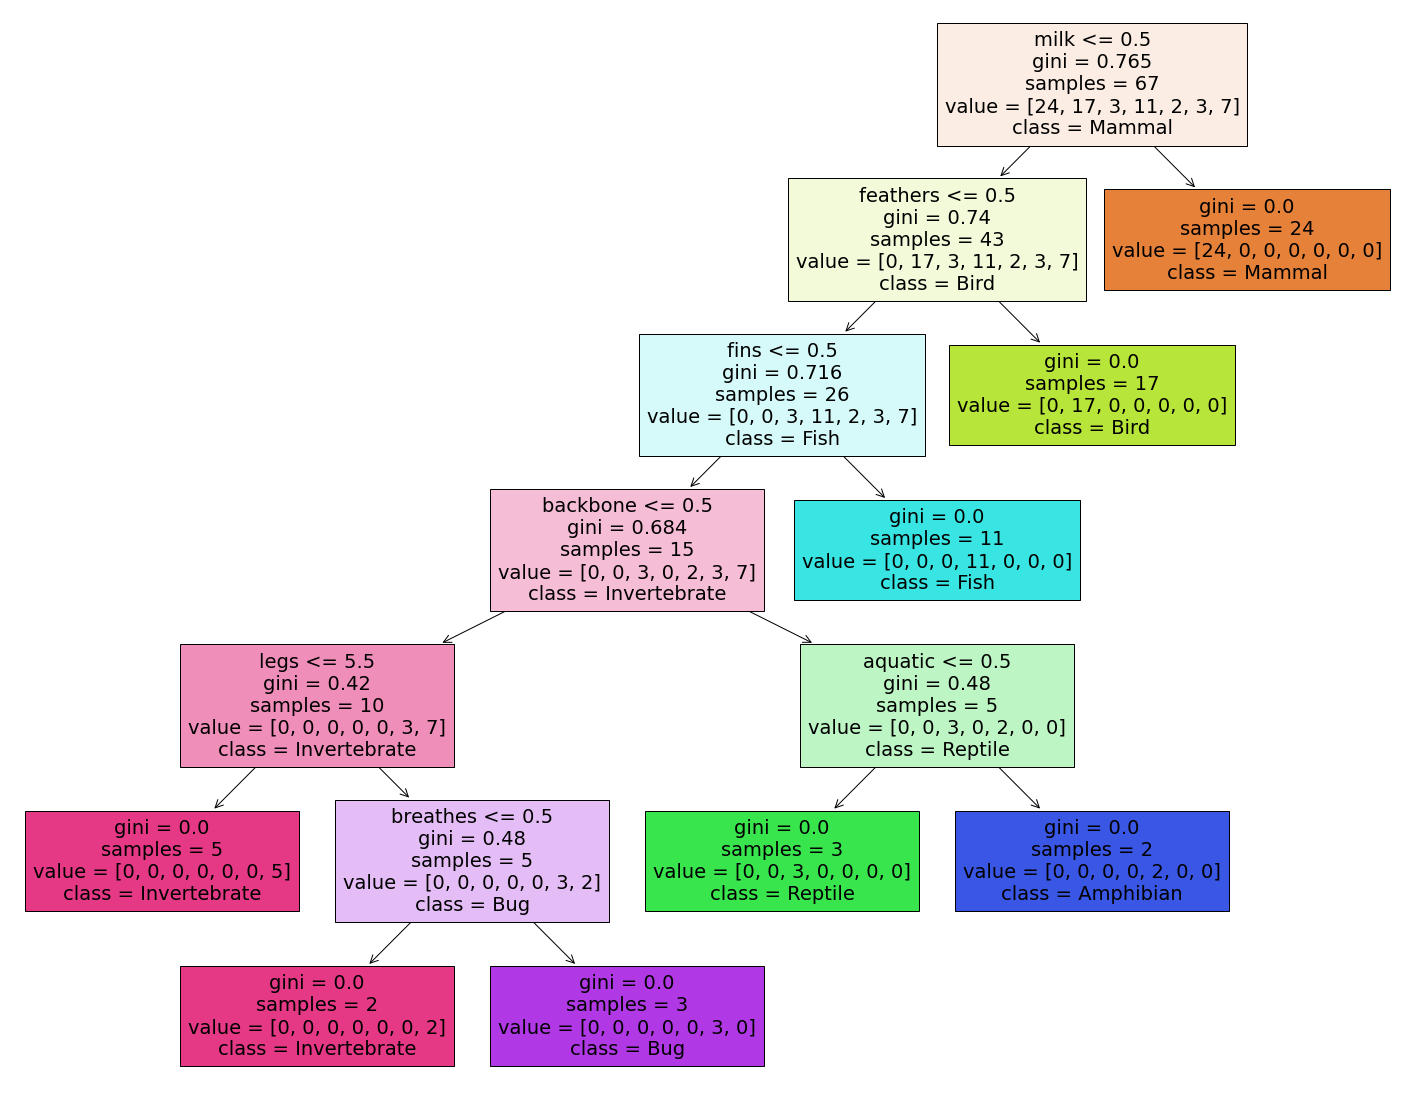

In [43]:
import matplotlib.pyplot as plt


model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


fig=plt.figure(figsize=(25,20))
tree.plot_tree(model,feature_names=X_train.columns,class_names=classes,filled=True)

In [24]:
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
66,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [26]:
pred = model.predict(X_test)

In [46]:
pred[:10]

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1])

In [30]:
y_test

84    1
55    1
66    1
67    1
45    1
39    6
22    1
44    1
10    1
0     1
18    4
30    6
97    6
33    2
77    7
4     1
93    1
78    2
12    4
31    1
76    3
89    5
26    5
42    6
70    1
15    7
40    6
72    7
9     1
96    1
11    2
91    3
64    1
28    1
Name: class_type, dtype: int64

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(confusion_matrix(y_test, pred))

[[17  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  2]]


In [47]:
# print(classification_report(y_test, pred, target_names=classes))

In [38]:
print("Actual\t\t\t\tPrediction")
y_test = list(y_test)

for i in range(len(y_test[:25])):
    print(f"{classes[y_test[i]-1]}\t\t\t\t{classes[pred[i]-1]}")

Actual				Prediction
Mammal				Mammal
Mammal				Mammal
Mammal				Mammal
Mammal				Mammal
Mammal				Mammal
Bug				Bug
Mammal				Mammal
Mammal				Mammal
Mammal				Mammal
Mammal				Mammal
Fish				Fish
Bug				Bug
Bug				Bug
Bird				Bird
Invertebrate				Invertebrate
Mammal				Mammal
Mammal				Mammal
Bird				Bird
Fish				Fish
Mammal				Mammal
Reptile				Amphibian
Amphibian				Amphibian
Amphibian				Amphibian
Bug				Bug
Mammal				Mammal
